In [1]:
import numpy as np 
import random
import matplotlib.pyplot as plt
np.random.seed(42)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster", font_scale = .6, rc={"grid.linewidth": 0.1})


# Reinforcemnt Learning - Multi-armed bandit problem
- Greedy algorithm
- Epsilon-greedy algorithm
- Upper confidence bound (UCB) algorithm
- Softmax algorithm
- Contextual bandit
  
### Multi-armed bandit problem
- A gambler is faced with a row of slot machines, each of which has a lever. When the lever is pulled, the machine will return a reward. The gambler's objective is to maximize the total reward by pulling the levers of the machines in the best order.    
- In this example the **Agent** is the gambler and the **Environment** is the slot machines. The agent interacts with the environment by pulling the levers of the machines and receiving rewards. 

<p align="center">
  <img src="ddd.png" alt="Alt text" width="500" height="300">
</p>


- In this example at any arbitary time step 
    - Agent first observes the currrent state of the environment s_t and it's corresponding reward r_t. 
    - Then the agent decides on an action a_t based on the (s_t, r_t) pair.
    - The action a_t is then applied to the environment and the environment transitions to a new state s_t+1 and the agent receives a new reward r_t+1. 



### Greedy algorithm
- Always there is a tradeoff between exploration and exploitation. This means that the agent has to decide whether to explore the environment to find the best action or to exploit the current best action.
- The greedy algorithm always exploits the current best action. This means that the agent always chooses the action that has the highest expected reward. The expected reward is the average of the rewards that the agent has received from that action mathematically represented as:

$$
Q(a) = \mathbb{E}[R_t| A_t=a]
$$
- where $Q(a)$ is the expected reward of action a, $R_t$ is the reward at time t and $A_t$ is the action at time t.
- An action value based method to estimate $Q(a)$ is to use the sample average of the rewards that the agent has received from that action. This is mathematically represented as: 
$$
Q_t(a) = \frac{\sum_{i=1}^{t-1} R_i \cdot 1_{A_i=a}}{\sum_{i=1}^{t-1} 1_{A_i=a}}
$$
- where $Q_t(a)$ is the estimated expected reward of action a at time t, $R_i$ is the reward at time i and $1_{A_i=a}$ is the indicator function that is 1 if $A_i=a$ and 0 otherwise.

In [2]:
n = 10 # number of actions
probs = np.random.rand(n) # action probabilities
epsilon = 0.1
e_greedy = False # True for epsilon-greedy, False for greedy

In [3]:
# functions

def update_results(results_, choice_, reward_):
    results_[choice_, 0] += 1
    results_[choice_, 1] += (results_[choice_, 1] * results_[choice_, 0] + reward_) / (results_[choice_, 0] + 1)
    return results_

def get_reward(prob_, n_):
    reward_ = 0
    for i in range(n_):
        if random.random() < prob_:
            reward_ += 1
    return reward_


def test_run(ep, action):
    results_ = np.zeros((n ,2)) # action results
    rewards = [0]
    for i in range(500):

        selected_choice = action(results_, ep)
        
        r = get_reward(probs[selected_choice], n)
        results_ = update_results(results_, selected_choice, r)
        rewards_avg = rewards[-1] + (r - rewards[-1]) / (i + 2)
        rewards.append(rewards_avg)
    return rewards

Text(0.5, 1.0, 'Greedy Algorithm')

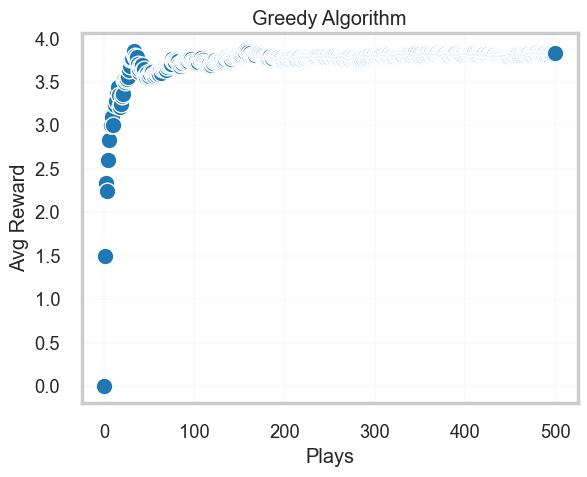

In [4]:
# Greedy algorithm
# results_greedy  = np.zeros((n ,2)) # action results
# rewards_greedy = [0]
# for i in range(500):
#     choice = choose_action(results_greedy, epsilon)
#     reward_g = get_reward(probs[choice], n)
#     results = update_results(results_greedy, choice, reward_g)
#     avg_rewards = rewards_greedy[-1] + (reward_g - rewards_greedy[-1]) / (i + 2)
#     rewards_greedy.append(avg_rewards)
def choose_action(results_, epsilon_):
        return np.argmax(results_[:,1])
rewards_greedy = test_run(ep=0.1, action=choose_action) 

sns.scatterplot(x=np.arange(len(rewards_greedy)), y=rewards_greedy)
plt.xlabel('Plays')
plt.ylabel('Avg Reward')
plt.title('Greedy Algorithm')

### Epsilon-greedy algorithm 
- The greedy algorithm always chooses the action with the highest expected reward. This means that the agent will never explore the environment to find the best action. This can be a problem because the agent may miss the best action if it does not explore the environment. In order to solve this problem, the epsilon-greedy algorithm was introduced. 
- The epsilon-greedy algorithm is a simple extension of the greedy algorithm. The epsilon-greedy algorithm chooses the action with the highest expected reward with probability 1-epsilon and chooses a random action with probability epsilon. This means that the agent will explore the environment with probability epsilon and exploit the current best action with probability 1-epsilon.

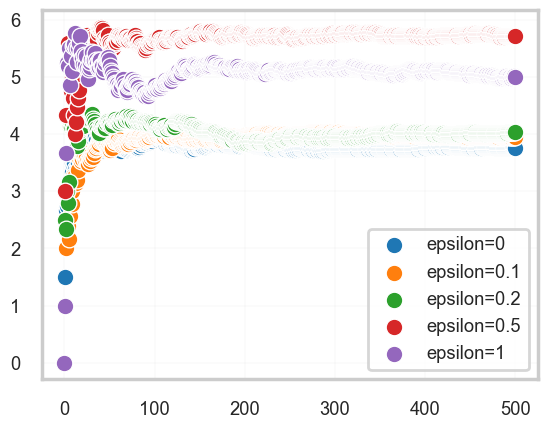

In [5]:
# Epsilon-Greedy algorithm
epsilons = [0, 0.1, 0.2, 0.5, 1]

def choose_action_e(results_, epsilon_):
    if np.random.rand() < epsilon_:
        return np.random.randint(n)
    else:
        return np.argmax(results_[:,1])
        

for eps in epsilons:
    rewards = test_run(eps, action=choose_action_e)
    sns.scatterplot(x=np.arange(len(rewards)), y=rewards, label=f'epsilon={eps}')



### Upper confidence bound (UCB) algorithm
- The UCB algorithm is a more sophisticated algorithm that balances exploration and exploitation. The UCB algorithm chooses the action with the highest upper confidence bound. The upper confidence bound is a measure of the uncertainty of the expected reward of an action. The upper confidence bound is mathematically represented as:    
$$
UCB(a) = argmax[ Q(a) + c \sqrt{\frac{\ln t}{N(a)}}] 
$$
- N(a) is the number of times that action a has been chosen, c is a constant that determines the level of exploration and t is the total number of times that the agent has chosen an action. The UCB algorithm chooses the action with the highest upper confidence bound. This means that the agent will explore the environment by choosing the action with the highest uncertainty of the expected reward.

/var/folders/ns/bkl2k1794xgbsdhb2l6n_07c0000gn/T/ipykernel_4411/1386915483.py:2: RuntimeWarning: invalid value encountered in divide
  choice_of_action = np.argmax(results_[:, 1] + confidence * (np.sqrt(np.log(time + 1) / results_[:, 0])))
/var/folders/ns/bkl2k1794xgbsdhb2l6n_07c0000gn/T/ipykernel_4411/1386915483.py:2: RuntimeWarning: divide by zero encountered in divide
  choice_of_action = np.argmax(results_[:, 1] + confidence * (np.sqrt(np.log(time + 1) / results_[:, 0])))


<Axes: >

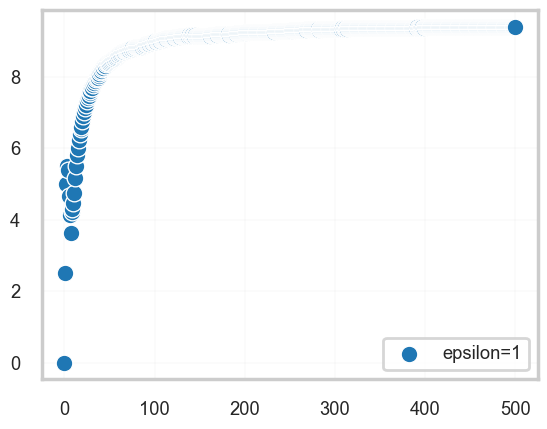

In [6]:
def choose_action_ubc(results_, confidence, time):
    choice_of_action = np.argmax(results_[:, 1] + confidence * (np.sqrt(np.log(time + 1) / results_[:, 0])))
    # print('choice of action:', choice_of_action)
    return choice_of_action

def test_run_ubc(ep=0.1):
    results_ = np.zeros((n ,2)) # action results
    rewards = [0]
    for i in range(500):

        selected_choice = choose_action_ubc(results_, ep, i)
        
        r = get_reward(probs[selected_choice], n)
        results_ = update_results(results_, selected_choice, r)
        rewards_avg = rewards[-1] + (r - rewards[-1]) / (i + 2)
        rewards.append(rewards_avg)
    return rewards
rewards_ubc = test_run_ubc(eps)
sns.scatterplot(x=np.arange(len(rewards_ubc)), y=rewards_ubc, label=f'epsilon={eps}')

### Softmax algorithm
- The softmax algorithm is another algorithm that balances exploration and exploitation. The softmax algorithm chooses the action with the highest probability of being the best action. The probability of an action being the best action is mathematically represented as:
$$
P(a) = \frac{e^{Q(a)/\tau}}{\sum_{i=1}^{n} e^{Q(i)/\tau}}
$$
- where P(a) is the probability of action a being the best action, Q(a) is the expected reward of action a, n is the number of actions and $\tau$ is a temperature parameter that determines the level of exploration. The softmax algorithm chooses the action with the highest probability of being the best action. This means that the agent will explore the environment by choosing the action with the highest probability of being the best action.

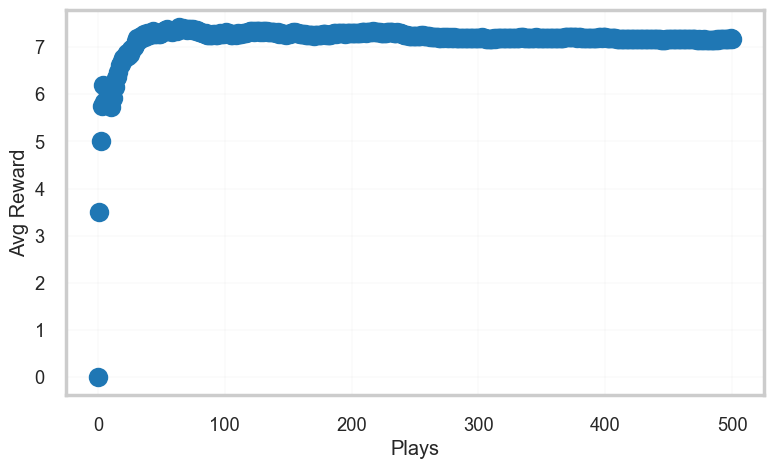

In [7]:
np.random.seed(44)
probs = np.random.rand(n)
record = np.zeros((n,2))

def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

def update_record(record,action,r):
    new_r = (record[action,0] * record[action,1] + r) / (record[action,0] + 1)
    record[action,0] += 1
    record[action,1] = new_r
    return record

def get_reward(prob, n=10):
    reward = 0;
    for i in range(n):
        if random.random() < prob:
            reward += 1
    return reward


fig,ax = plt.subplots(1,1)
ax.set_xlabel("Plays")
ax.set_ylabel("Avg Reward")
fig.set_size_inches(9,5)
rewards = [0]
for i in range(500):
    p = softmax(record[:,1],tau=0.7)
    choice = np.random.choice(np.arange(n),p=p)
    r = get_reward(probs[choice])
    record = update_record(record,choice,r)
    mean_reward = ((i+1) * rewards[-1] + r)/(i+2)
    rewards.append(mean_reward)
ax.scatter(np.arange(len(rewards)),rewards)

### Contextual bandit
- In the multi-armed bandit problem, the agent chooses an action based on the current state of the environment. This means that the agent does not take into account the history of the environment. In the contextual bandit problem, the agent chooses an action based on the current state of the environment and the history of the environment. This means that the agent takes into account the history of the environment when choosing an action.
- The contextual bandit problem is a more general problem than the multi-armed bandit problem. The contextual bandit problem is a generalization of the multi-armed bandit problem. The contextual bandit problem is a generalization of the multi-armed bandit problem because the agent chooses an action based on the current state of the environment and the history of the environment. This means that the agent takes into account the history of the environment when choosing an action.




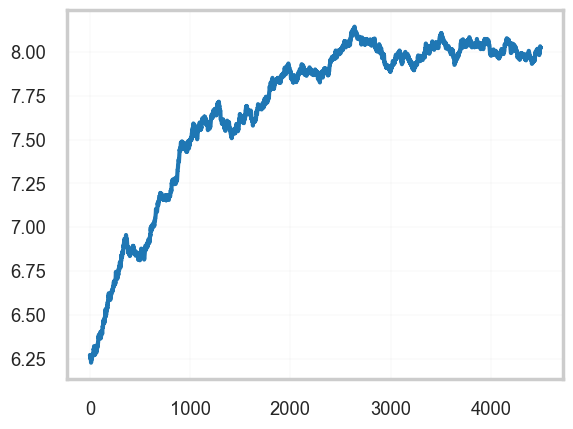

In [8]:
import torch

arms = 10
N, D_in, H, D_out = 1, arms, 100, arms

def softmax(av, tau=1.12):
    softm = ( np.exp(av / tau) / np.sum( np.exp(av / tau) ) )
    return softm

class ContextBandit:
    def __init__(self, arms=10):
        self.arms = arms
        self.init_distribution(arms)
        self.update_state()
        
    def init_distribution(self, arms):
        self.bandit_matrix = np.random.rand(arms, arms)
    
    def reward(self, prob):
        reward = 0
        for i in range(self.arms):
            if random.random() < prob:
                reward += 1
        return reward
    
    def get_state(self):
        return self.state
    
    def update_state(self):
        self.state = np.random.randint(0, self.arms)
    
    def get_reward(self, arm):
        return self.reward(self.bandit_matrix[self.get_state()][arm])
    
    def choose_arm(self, arm):
        reward = self.get_reward(arm)
        self.update_state()
        return reward
    
model = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.ReLU(),
    torch.nn.Linear(H, D_out),
    torch.nn.ReLU(),
)

loss_fn = torch.nn.MSELoss()
env = ContextBandit(arms)

def one_hot(N, pos, val=1):
    one_hot_vec = np.zeros(N)
    one_hot_vec[pos] = val
    return one_hot_vec


def running_mean(x,N=50):
    c = x.shape[0] - N
    y = np.zeros(c)
    conv = np.ones(N)
    for i in range(c):
        y[i] = (x[i:i+N] @ conv)/N
    return y

def train(env, epochs=5000, learning_rate=1e-2):
    cur_state = torch.Tensor(one_hot(arms,env.get_state())) #A
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    rewards = []
    for i in range(epochs):
        y_pred = model(cur_state) #B
        av_softmax = softmax(y_pred.data.numpy(), tau=2.0) #C
        av_softmax /= av_softmax.sum() #D
        choice = np.random.choice(arms, p=av_softmax) #E
        cur_reward = env.choose_arm(choice) #F
        one_hot_reward = y_pred.data.numpy().copy() #G
        one_hot_reward[choice] = cur_reward #H
        reward = torch.Tensor(one_hot_reward)
        rewards.append(cur_reward)
        loss = loss_fn(y_pred, reward)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        cur_state = torch.Tensor(one_hot(arms,env.get_state())) #I
    return np.array(rewards)

rewards = train(env)

plt.plot(running_mean(rewards,N=500))